# Primera exploración de data


https://en.wikipedia.org/wiki/Iris_flower_data_set



In [25]:
# libreria numpy
import numpy as np

# libreria panda
import pandas as pd             

# libreria seaborn
import seaborn as sns
sns.set(style="white", color_codes=False)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

# seaborn usualmente genera errores que podríamos ignorarlos
import warnings 
warnings.filterwarnings("ignore")

# libreria matplot
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#Cargamos el data set
iris = pd.read_csv('IrisCategorical.csv')

iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


La columna ID no es de utilidad y podemos eliminarla.

In [27]:
iris = iris.drop('Id', axis=1)
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Estadísticas básicas!!!

In [28]:
#asi de simple!!!
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Creemos un poco de estadisticas sobre el ATRIBUTO Species

In [29]:
#vamos a contar cuantos valores tenemos de cada especie
#Iris Virginica
#Iris Versicolor
#Iris Setosa
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Ahora vamos a presentar los datos de distribución de SepalLengthCm 

In [30]:
from scipy.stats import iqr
numerical_variables = iris.columns[iris.columns!='Species']

# Con numpy calculamos la diferencia entre
# el máximo y minimo en las variables númercias (SepalLengthCm, SepalWidth, etc)
print('Variable Range')
for c in numerical_variables:
    print('%s\t%.3f'%(c,np.max(iris[c]) - np.min(iris[c])))


Variable Range
SepalLengthCm	3.600
SepalWidthCm	2.400
PetalLengthCm	5.900
PetalWidthCm	2.400


Calculemos la correlación existente entre los diferentes atributos

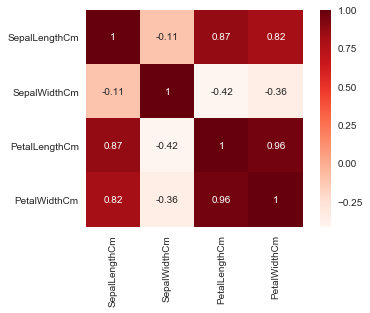

In [31]:
# Ocupamos el método Pearson para la correlación
cov=iris.corr(method='pearson')
# Generamos un mapa de calor con Seaborn
sns.heatmap(cov,square=True,annot=True,cmap="Reds")

Relación existente entre variables utilizando clustermaps
en la matriz de correlación (antes presentado)

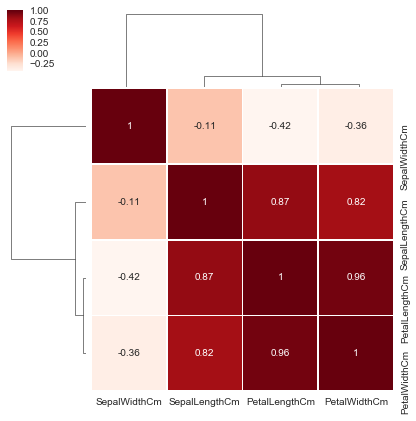

In [32]:
# Ocupamos tipo clustermap y no tipo heatmap
sns.clustermap(iris.corr(), square=True, annot=True, cmap="Reds",
               linewidths=.75, figsize=(7, 7))

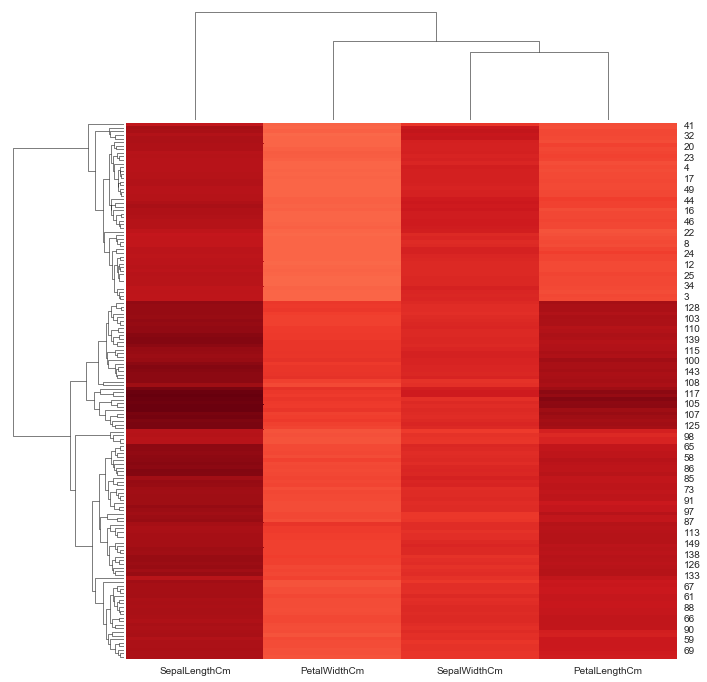

In [33]:
# Todo (poco entendible)
cm = sns.clustermap(iris[numerical_variables], annot=False, center=0, cmap="Reds", figsize=(12, 12))
cm.cax.set_visible(False)

Podemos revisar como varian los diferentes parametros 

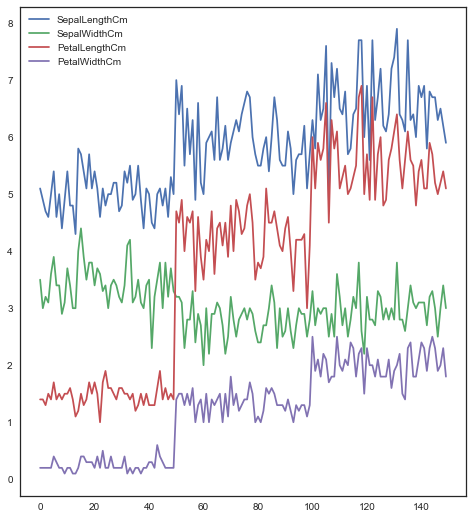

In [34]:
plt.figure(figsize=(8,9))
plt.plot(iris['SepalLengthCm'])
plt.plot(iris['SepalWidthCm'])
plt.plot(iris['PetalLengthCm'])
plt.plot(iris['PetalWidthCm'])
plt.legend(loc='best')

Iris-versicolor, Iris-setosa, y Iris-virginica calculamos
Mean y gráficos

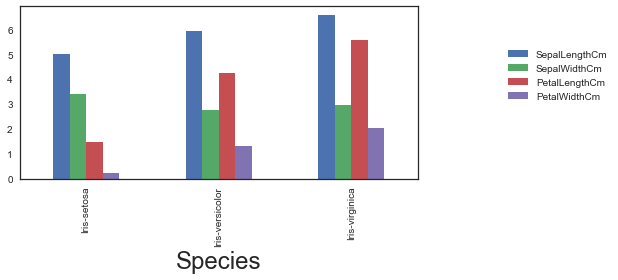

In [35]:
#agrupamos por tipos de especies y calculamos promedio
iris_gb=iris.groupby(['Species']).mean()

#graficamos en tipo barra
iris_gb.plot(kind='bar')
plt.tight_layout()
# Colocamos la leyenda en la parte derecha superior
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 0.8))

Text(0.5,1,'Distribución y densidad de Sepal Length (15 bins)')

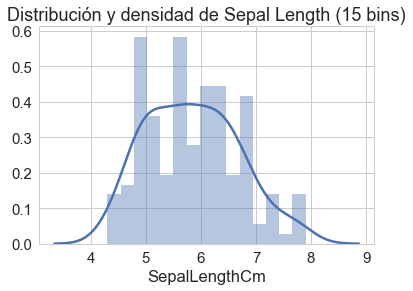

In [36]:
# histogramas
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(iris['SepalLengthCm'],bins=15)
dp.set_title('Distribución y densidad de Sepal Length (15 bins)')

Text(0.5,1,'Distribución y densidad de Sepal Length de Iris-setosa')

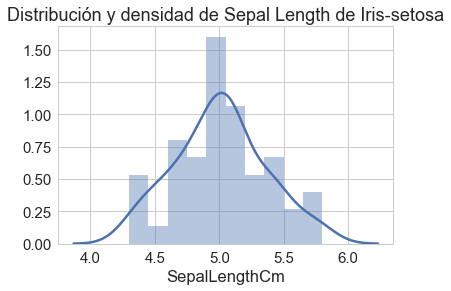

In [37]:
iris_is = iris[iris['Species'] == 'Iris-setosa']
hist1 = sns.distplot(iris_is['SepalLengthCm'],bins=10)
hist1.set_title('Distribución y densidad de Sepal Length de Iris-setosa')

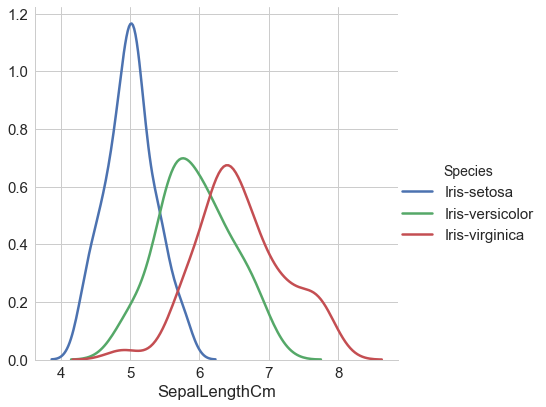

In [38]:
# Todas las especies
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "SepalLengthCm") \
   .add_legend()

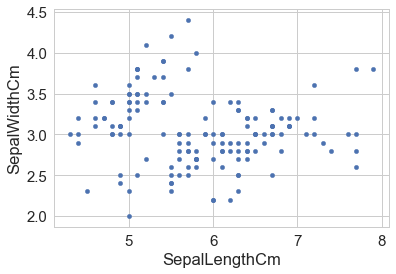

In [39]:
# Scatter
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

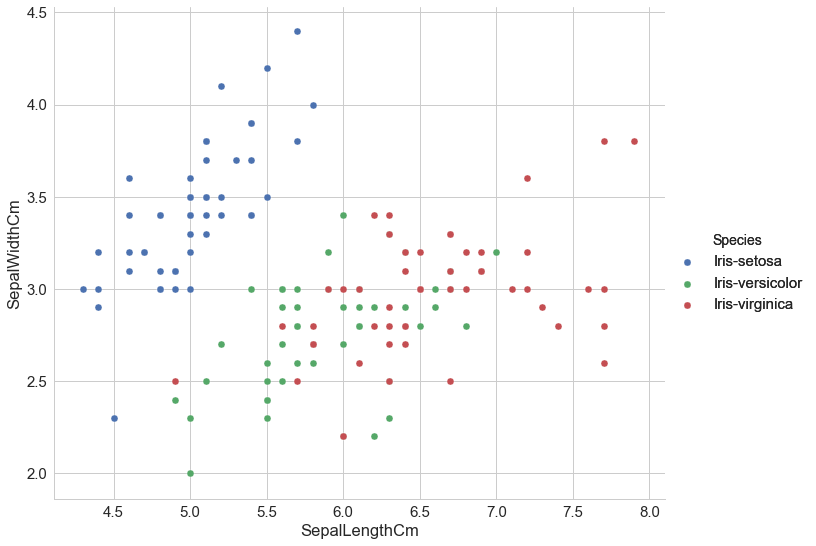

In [40]:
# Por clase
sns.pairplot(iris, x_vars=["SepalLengthCm"], y_vars=["SepalWidthCm"], hue="Species", size=8) \
   .add_legend()

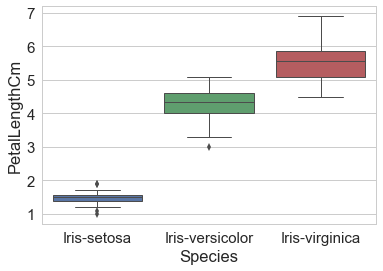

In [41]:
# Box Plot
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

BoxPlot + Scatter

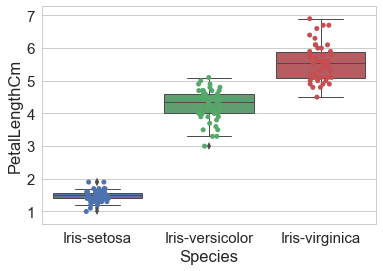

In [42]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

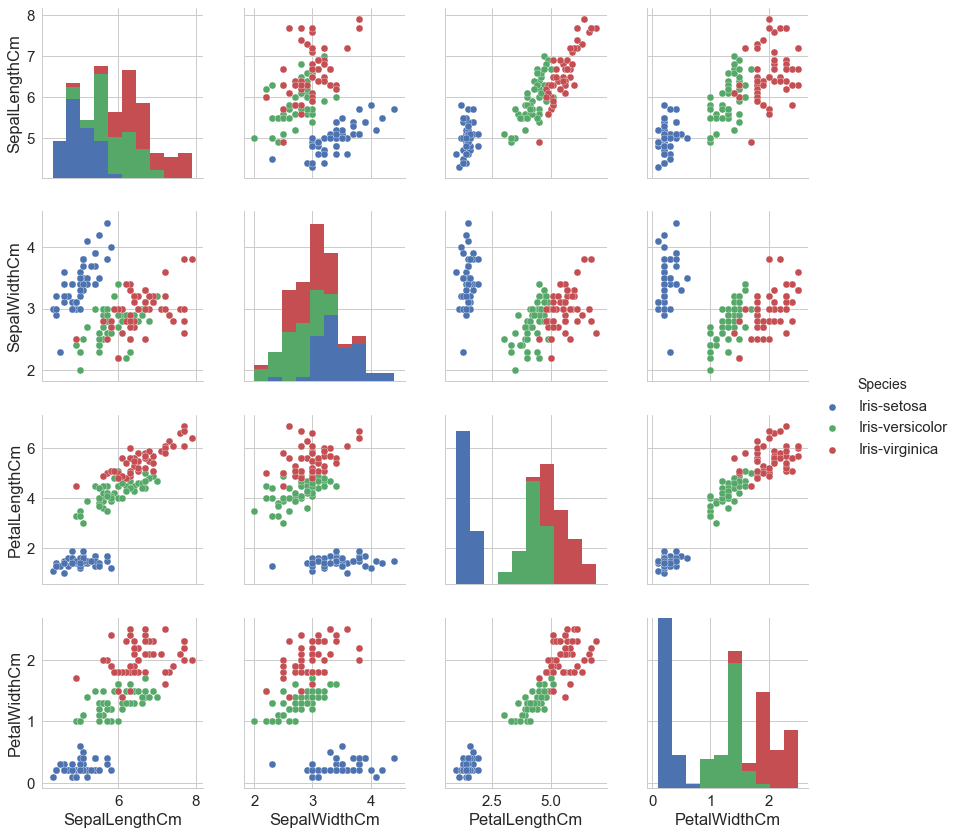

In [43]:
sns.pairplot(iris, hue="Species", size=3)

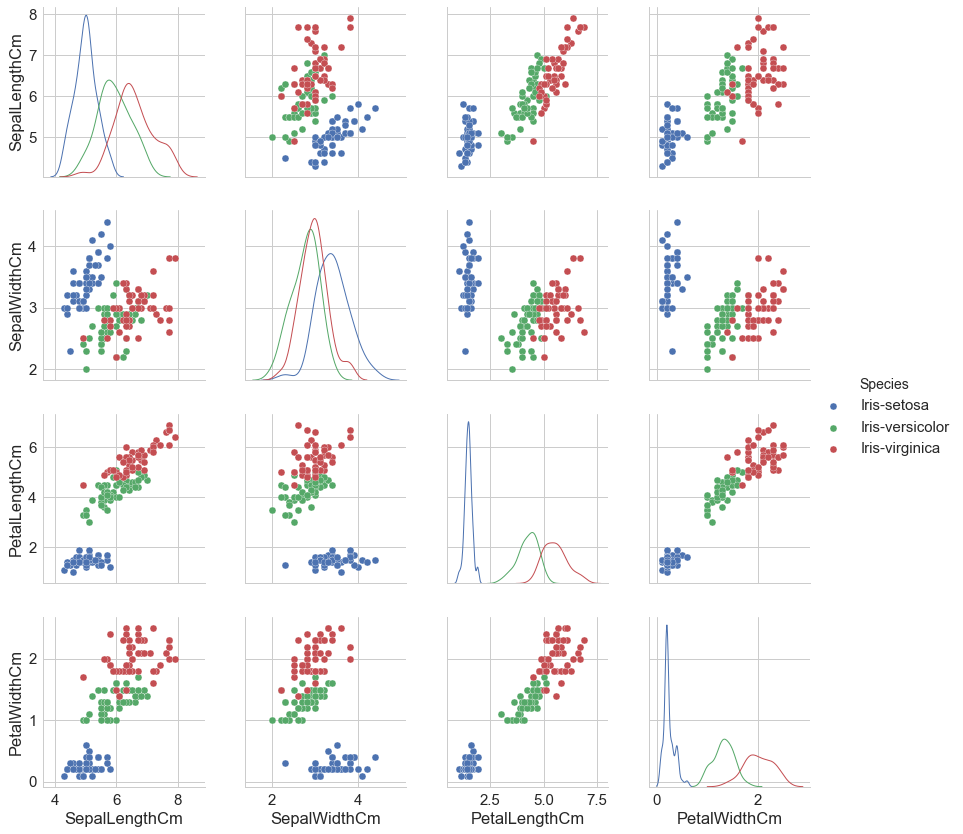

In [44]:
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde")

## Principal Component Analysis

4 dimensiones en 2!!!

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [46]:
# en x valores num
# en y valores Species
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values

Normalizar!
Eliminando el promedio y escalando la unidad de varianza

In [47]:
x = StandardScaler().fit_transform(x)

In [48]:
# Definimos los componentes es decir 2
pca = PCA(n_components=2)
new_data = pca.fit_transform(x)
pca_iris = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2'])

In [49]:
pca_iris_complete = pca_iris
pca_iris_complete['Species'] = iris[['Species']]

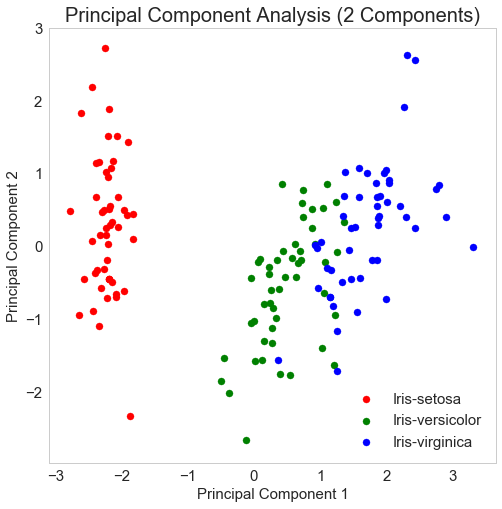

In [50]:
#Plot!!
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_iris_complete['Species'] == target
    ax.scatter(pca_iris_complete.loc[indicesToKeep, 'principal component 1']
               , pca_iris_complete.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [51]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))


Explained Variance
   Component 1 0.73
   Component 2 0.23
   Total Explained Variance 0.96


In [52]:
print("Components")
for i,c in enumerate(pca.components_):
    print("Component %d\t%s"%(i,str(c)))

Components
Component 0	[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Component 1	[ 0.37231836  0.92555649  0.02109478  0.06541577]


In [53]:
data = np.dot(x,np.transpose(pca.components_))
data[:5,:]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [54]:
pca_iris.head(5)

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


We can apply PCA with the same number of components as the 

In [55]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values
full_pca = PCA()
fitted = full_pca.fit_transform(x)
full_pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

# t-SNE

In [56]:
from sklearn.manifold import TSNE

perplexity=80
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300, random_state=1)
# tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_result = tsne.fit_transform(x)

[t-SNE] Computing 149 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 1.545674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.070763
[t-SNE] Error after 300 iterations: 0.030327


In [57]:
iris_tsne = pd.DataFrame({'x':tsne_result[:,0], 'y':tsne_result[:,1], 'Species':iris['Species']})

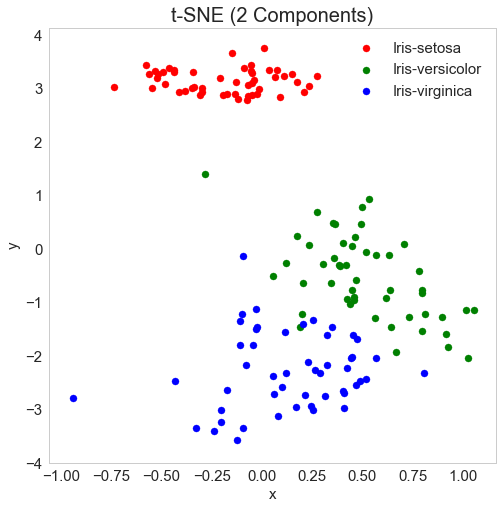

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('t-SNE (2 Components)', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_tsne['Species'] == target
    ax.scatter(iris_tsne.loc[indicesToKeep,'x'], iris_tsne.loc[indicesToKeep,'y'], c=color, s=50)
ax.legend(targets)
ax.grid()